<a href="https://colab.research.google.com/github/eslavathjagadish/Akridata_DS_Visualization/blob/main/Akridata_DS_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install python-mnist

In [2]:
import keras
from keras.datasets import mnist

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Data Split between Train and Test ets
(X_train,y_train),(X_test,y_test)=mnist.load_data()
num_classes=10

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

CHECK AN IMAGE FROM DATASET

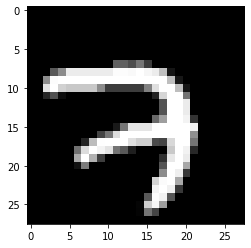

Digit: 0


In [6]:
img=5000
sample_image=X_train[img]
pixels=sample_image.reshape((28,28))
plt.imshow(pixels,cmap='gray')
plt.show()
print('Digit:',np.argmax(y_train[img]))

PREPROCESSING INPUT DATA

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [8]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

X_train=np.expand_dims(X_train,axis=3)
X_test=np.expand_dims(X_test,axis=3)
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

60000 train samples
10000 test samples


In [9]:
#Converting the class labels into one hot encoded vectors
y_train=tf.keras.utils.to_categorical(y_train,num_classes)
y_test=tf.keras.utils.to_categorical(y_test,num_classes)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


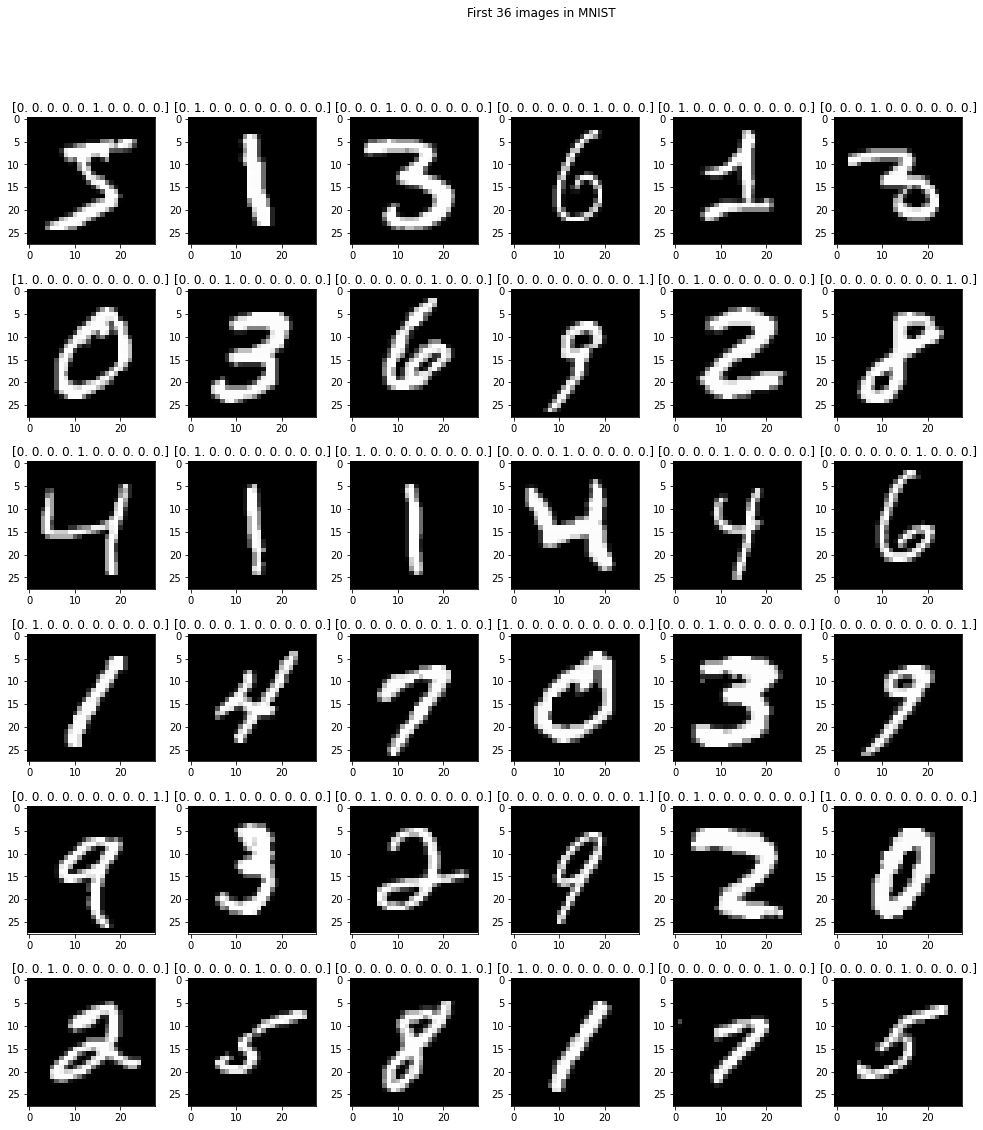

In [11]:
# plot first 36 images in MNIST
fig, ax = plt.subplots(6, 6, figsize = (15, 16))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(X_train[x + y * 6].reshape((28, 28)), cmap = 'gray')
    ax[x, y].set_title(y_train[x + y * 6])

In [12]:
print('Dimension of X_train:',X_train.shape)
print('Dimension of Y_train:',y_train.shape)
print('Dimension of X_test:',X_test.shape)
print('Dimension of Y_test:',y_test.shape)

Dimension of X_train: (60000, 28, 28, 1)
Dimension of Y_train: (60000, 10)
Dimension of X_test: (10000, 28, 28, 1)
Dimension of Y_test: (10000, 10)


In [13]:
X_train[0,:].shape

(28, 28, 1)

BUILDING THE CNN MODEL WITH KERAS TO FLATTEN

In [14]:
model=Sequential()
# 32 is the no. of filters (filter bank)
# 5x5 filter dimension
# padding: 'same' - the dimension of the input image and the output feature map is the same
# that means we have used padding

# Feature extractor network follows
model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(5,5),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Converting the feature in a 1d vector
model.add(Flatten())

# Feature classifier network follows
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))

#Compile Model
model.compile(loss='categorical_crossentrophy',optimizer='adam',metrics=['accuracy'])

SUMMARY OF CNN MODEL

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3212288   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [16]:
import plotly.graph_objects as go

In [40]:
f = go.FigureWidget([go.Scatter(x=X_train[:6], y=y_train[:6], mode='markers')])

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s


scatter.on_click(update_point)

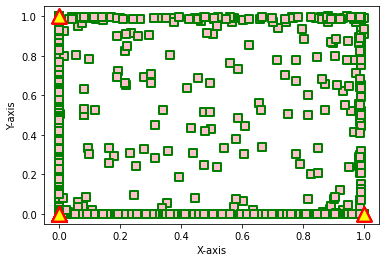

In [36]:
plt.scatter(X_train[:6],X_test[:6],c='pink',linewidths=2,marker='s',edgecolors='green',s=50)
plt.scatter(y_train[:6],y_test[:6],c='yellow',linewidths=2,marker='^',edgecolors='red',s=200)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [29]:
colormap=(X_train[:1],y_train[:1])

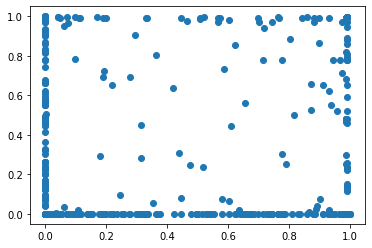

In [32]:
plt.scatter(X_train[:2],X_test[:2])